In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **Signals**

In [9]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
sample = sample[:2500]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_peaks_loc=True)
measurement.set_agg_beat()

In [11]:
sig = list(measurement.signals.values())[0]
print(f"FS = {sig.fs}\nDuration = {len(data[0]) / sig.fs}")

FS = 125
Duration = 60.0


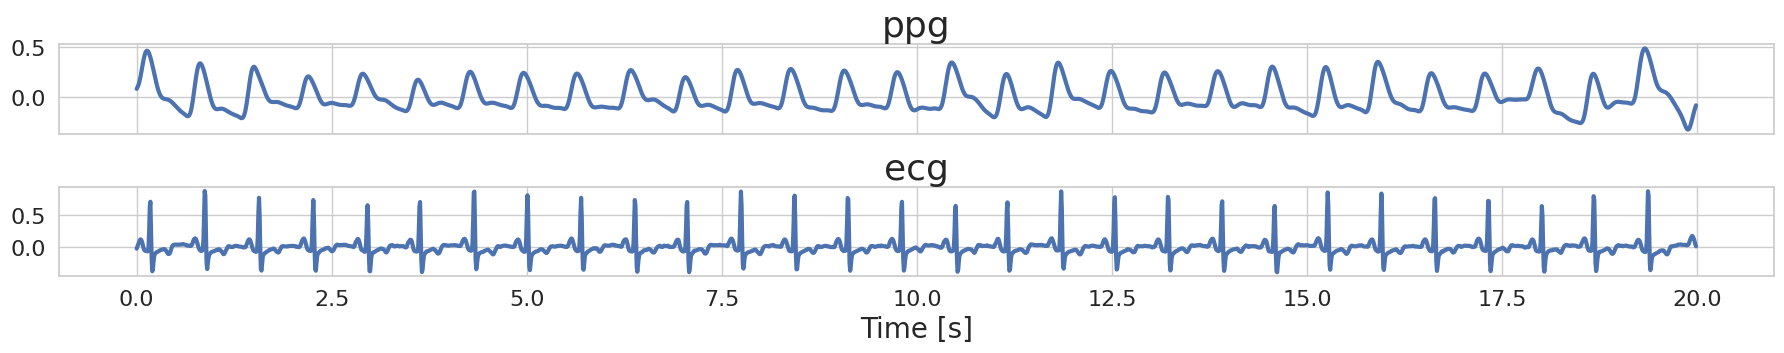

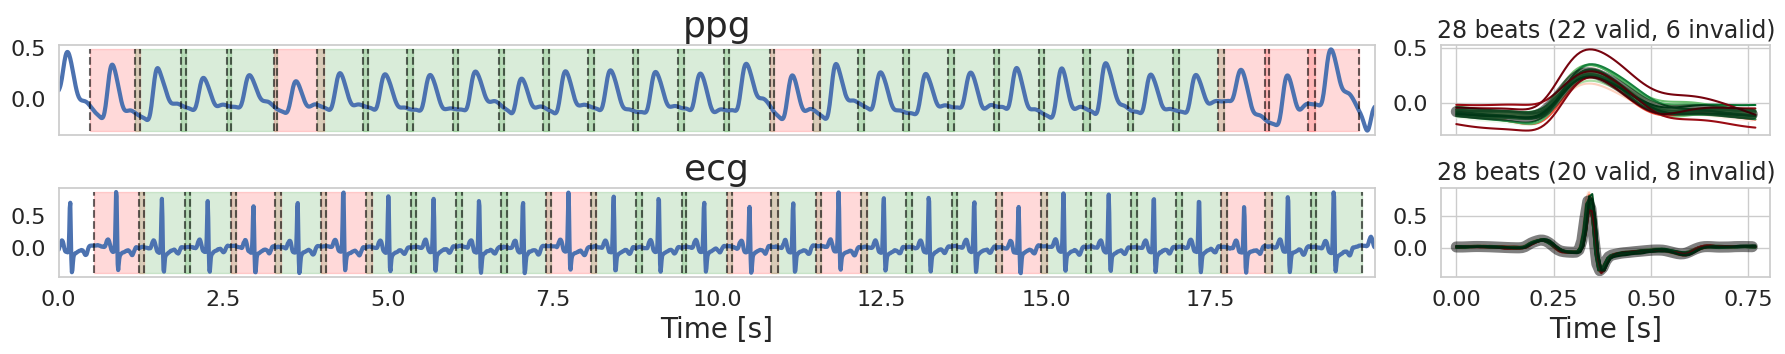

In [12]:
figs = {
    "mimic_signals": measurement.plot(0, -1),
    "mimic_beats_segmentation": measurement.plot_beats_segmentation(invalid=True, color_validity=True)
}

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

# **Statistics**

In [1]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datamodules import MimicDataModule

TARGET = "sbp_dbp_avg"
dm = MimicDataModule("whole_signal_features", target=TARGET, bp_targets=['sbp', 'dbp'])
dm.setup()

No info file for that split
No info file for that split
No info file for that split


In [12]:
len(dm.train) + len(dm.val) + len(dm.test)

20842

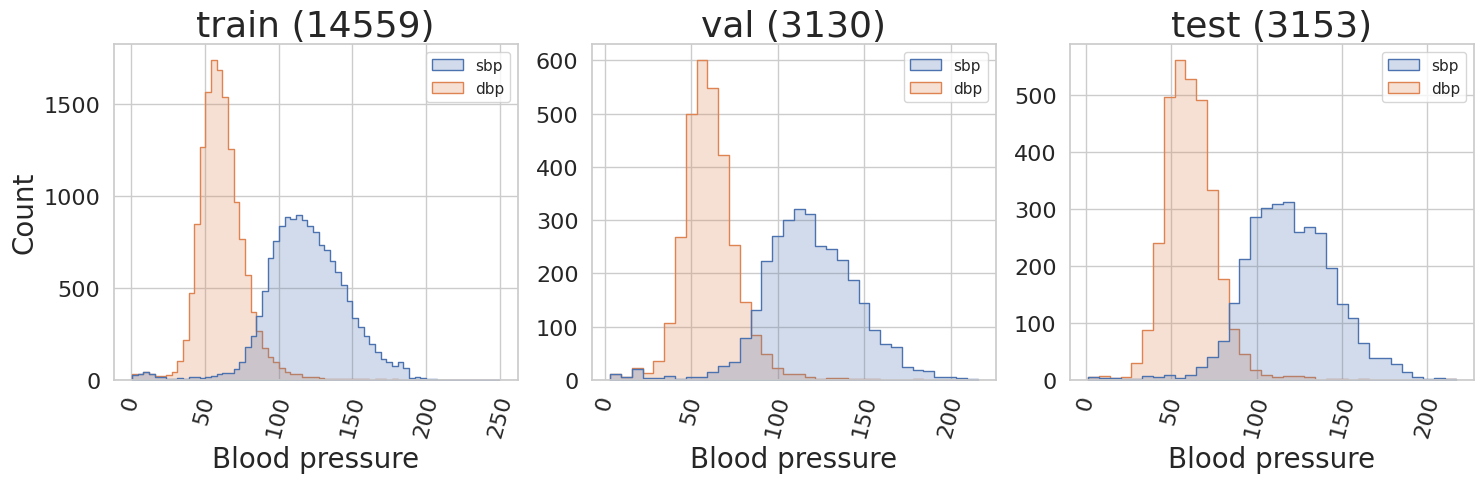

In [13]:
figs = {
    "mimic_statistics": dm.plot_targets(),
}

In [14]:
for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")